# TASK-2

## Prediction using Supervised ML

Here 2 varaibles given, based on which need to predict the percentage of an student based on the number of study hours.

### Author- Sunny Kumar Tripathi

## Step 1: Importing necessary python package

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Step 2: Importing dataset

In [2]:
# Importing here dataset from url
url= "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df= pd.read_csv(url)
df.head()

df=pd.read_csv('student_scores - student_scores.csv')



In [3]:
#Data with null values
df.isnull().sum()

#NO null values 

Hours     0
Scores    0
dtype: int64

In [4]:
# data shape and size and other information
print('Shape of Data is:',df.shape)
print('Size of Data is:',df.size)
print('Dimension of Data is:',df.ndim)
print('Various Insights of Data:\n')
df.info()

Shape of Data is: (25, 2)
Size of Data is: 50
Dimension of Data is: 2
Various Insights of Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Data Columns
print('Columns in Data ----',df.columns)

Columns in Data ---- Index(['Hours', 'Scores'], dtype='object')


In [6]:
#Correlation Between data

df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [7]:
# Data Description
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Step 3: Plot & Visualization

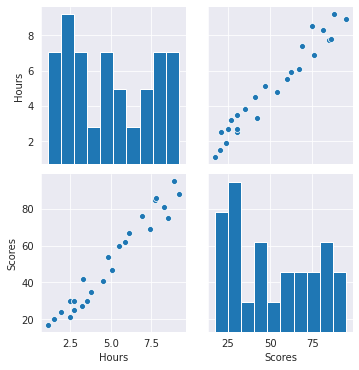

In [8]:
#Using Scatter/pair plot relationship between variables
sns.set_style('darkgrid')
sns.pairplot(df)
plt.show()

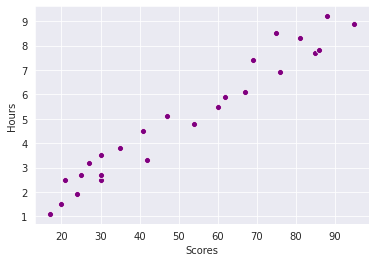

In [9]:
sns.scatterplot(x=df.Scores,y=df.Hours,color='purple',marker='o')
plt.show()

          Plot shows Positive Linear Relationship

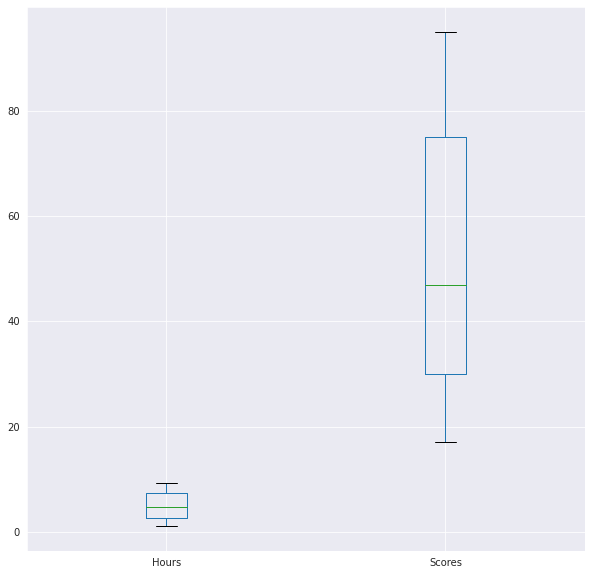

In [10]:
#From scatter plot we found no outliers , again cross Checking Outliers,no value found
plt.figure(figsize=(10,10))
df.boxplot()
plt.show()

## Step 4: Organizing data into training & testing sets

In [11]:
#Defining Features n Label 
X = df.drop("Scores",axis=1) #Independent variables aka Feature 
y = df['Scores'] #Dependent variables aka Label
print(X.shape)
print(y.shape)


(25, 1)
(25,)


In [12]:
#Train test split
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)
print('X Train Shape:',X_train.shape)
print('X Test Shape:',X_test.shape)
print('y Train Shape:',y_train.shape)
print('X Test Shape:',y_test.shape)

X Train Shape: (20, 1)
X Test Shape: (5, 1)
y Train Shape: (20,)
X Test Shape: (5,)


## Step 5: Model evaluation & prediction

## Fit the train data into Model


In [13]:
from sklearn.linear_model import LinearRegression
lr1=LinearRegression()
lr1.fit(X_train,y_train)

LinearRegression()

In [14]:
print(lr1.coef_)
print(lr1.intercept_)


[9.91065648]
2.018160041434683


In [15]:
#Predicting the scores
y_pred=lr1.predict(X_test) 
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [16]:
# Comparing Actual vs Predicted
df_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_predicted

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


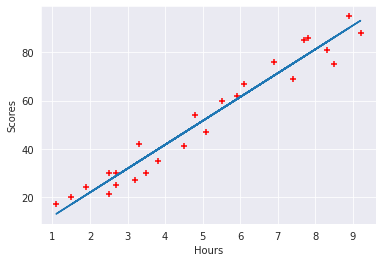

In [17]:
# Plotting the regression line
reg_line = lr1.coef_*X+lr1.intercept_

plt.scatter(X, y,color='red',marker='+')
plt.plot(X,reg_line);
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [18]:
#Accuracy
lr1.score(X_test,y_test)

0.9454906892105356

In [19]:
from sklearn.linear_model import Ridge,Lasso

#Ridge
rd=Ridge()
rd.fit(X_train,y_train)
rd.score(X_test,y_test)


0.9469535028586777

In [20]:
#LASSO
ls=Lasso(alpha=3)
ls.fit(X_train,y_train)
ls.score(X_test,y_test)

0.951357783797495

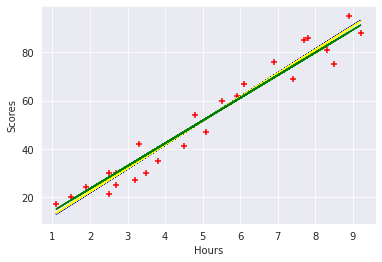

In [21]:
# Plotting the regression line
reg_line = lr1.coef_*X+lr1.intercept_
rd_line = rd.coef_*X+rd.intercept_
ls_line = ls.coef_*X+ls.intercept_

plt.scatter(X, y,color='red',marker='+')
p1=plt.plot(X,reg_line,color='blue');
p2=plt.plot(X,rd_line,color='yellow');
p3=plt.plot(X,ls_line,color='green');
#plt.legend('p1','p2','p3')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()


## Step 6: Performance computation 

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Regressor model performance:")
print("MAE =", mean_absolute_error(y_test, y_pred))
print("MSE =", mean_squared_error(y_test, y_pred))
print("RMSE =", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score =",r2_score(y_test, y_pred))


Regressor model performance:
MAE = 4.183859899002975
MSE = 21.5987693072174
RMSE = 4.6474476121003665
R2 score = 0.9454906892105356


## As per questioned

In [23]:
ls.predict([[9.25]]) 

array([91.74462644])

# CROSS VALIDATION

In [24]:
from sklearn.model_selection import cross_val_score,cross_val_predict #for various model

X = df.drop("Scores",axis=1) #Independent variables aka Feature 
y = df['Scores'] #Dependent variables aka Label
print(X.shape)
print(y.shape)

(25, 1)
(25,)


In [25]:
#Creating Different Model-Technique object

#LinearRegression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

#Applying Decission Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion='mse',max_depth=7)

#Applying Ensemble Technique-Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=7)

#Support Vector Regressor
from sklearn.svm import SVR
sv = SVR(kernel='rbf',gamma='auto')


In [26]:
#LinearRegression 
print(cross_val_score(lr,X,y,cv=3))
print(cross_val_score(lr,X,y,cv=3).mean()*100)

[0.90059648 0.95290326 0.93422769]
92.92424775400274


In [27]:
#Applying DecissionTreeRegressor
print(cross_val_score(dtr,X,y))
print(cross_val_score(dtr,X,y).mean()*100)

[0.71901261 0.92643302 0.83507612 0.87820878 0.9384501 ]
85.94361262471449


In [28]:
#Applying Ensemble Technique-RandomForestRegressor
print(cross_val_score(rf,X,y))
print(cross_val_score(rf,X,y).mean()*100)

[0.76541599 0.97513361 0.84136835 0.85866923 0.90133132]
88.64668750961468


In [29]:
#Applying SupportVectorRegressor
print(cross_val_score(sv,X,y))
print(cross_val_score(sv,X,y).mean()*100)

[-0.27473578  0.10569138  0.1913754   0.0570679   0.04710908]
2.5301596162142936


                      Best Model Accuracy is by Linear Regression

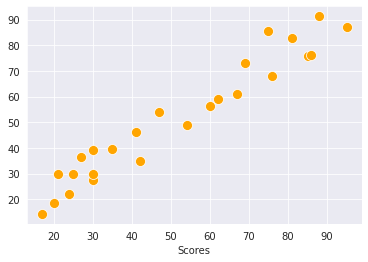

In [30]:
# Cross validated predictions
predict = cross_val_predict(ls, X, y, cv=5)
sns.scatterplot(y, predict,color='orange',s=100,)
plt.show()

In [31]:
# Comparing Actual vs Predicted
df_predict = pd.DataFrame({'Actual': y, 'Predicted': predict})  
df_predict

,Actual,Predicted
0,21,29.991497
1,47,54.118014
2,27,36.487098
3,75,85.668075
4,30,39.270927
5,20,18.423807
6,88,91.299485
7,60,56.281302
8,81,82.781549
9,25,29.781056


In [32]:
#Accuracy measures
import sklearn.metrics as metrics
from sklearn.metrics import r2_score,mean_squared_error
accuracy = metrics.mean_squared_error(y, predict)
rmse=np.sqrt(accuracy)
print('Cross Predicted MSE:', accuracy)
print('Cross Predicted RMSE:', rmse)
print("R2 score =",r2_score(y, predict))

Cross Predicted MSE: 39.65269613897749
Cross Predicted RMSE: 6.297038680123975
R2 score = 0.9354032386125567
